In [1]:
import sys
sys.path.append("../codes/")

import os
import pandas as pd
import matplotlib.pyplot as plt

import plotly.express as px


import numpy as np
import cv2

from video_handling import videoObj

../codes/video_handling.py:12: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
# choose video
video_name = "20181029_rectified_DJI_0034"

In [3]:
video = videoObj(f"../data/v1/videos/{video_name}.avi")

In [4]:
df = pd.read_csv(f"../data/v1/flightlogs/interpolated/{video_name}_interp.csv", index_col='Unnamed: 0' )
df.index = pd.to_timedelta(df.index,  unit='ms')
df.head()

,latitude,longitude,altitude(m),ultrasonicHeight(m),speed(mps),distance(m),max_altitude(m),max_ascent(m),max_speed(mps),max_distance(m),...,rcTransform,rcJoystickMode,appMode,FlyControllerSerialNumber_legacy,RemoteSerialNumber_legacy,BatterySerialNumber_legacy,Battery2SerialNumber,frontAvoidDist,backAvoidDist,isBrakingToAvoid
00:00:00,-22.857093,-43.230591,15.8,0.0,0.0,35.19,16.2,16.2,4.81,35.24,...,0.0,2.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
00:00:00.041667,-22.857093,-43.230591,15.8,0.0,0.0,35.19,16.2,16.2,4.81,35.24,...,0.0,2.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
00:00:00.083334,-22.857093,-43.230591,15.8,0.0,0.0,35.19,16.2,16.2,4.81,35.24,...,0.0,2.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
00:00:00.125001,-22.857093,-43.230591,15.8,0.0,0.0,35.19,16.2,16.2,4.81,35.24,...,0.0,2.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
00:00:00.166668,-22.857093,-43.230591,15.8,0.0,0.0,35.19,16.2,16.2,4.81,35.24,...,0.0,2.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0


In [5]:
df['velocity(mps)'] = np.sqrt(df['velocityX(mps)']**2 + df['velocityY(mps)']**2)
df['deltaS(m)'] = df['velocity(mps)']*0.041667 # TODO: time is hardcoded

In [6]:
# plot interactive line chart
# fig = px.line(data_frame=df, x=np.array(np.arange(len(df))), y=["velocity(mps)"])
# fig.show()

In [7]:
# # plot interactive line chart
# fig = px.line(data_frame=df, x=np.array(np.arange(len(df))), y="yaw(deg)")
# fig.show()

In [8]:
# key frames of each going (or coming) of the drone
key_frames = {
    "20180905_rectified_DJI_0010":[
        (15,600),(770, 1365), (1500, 2113), (2249, 2832), (2979,3577),
    ],
    "20180919_rectified_DJI_0019":[
        (29,378),
    ],
    "20180919_rectified_DJI_0021":[
        (15,854), (856,1488), (1493,2616), (2627,3636),(3646, 5242)
    ] , 
    "20181022_rectified_DJI_0025":[
        (15,507), (642,1139), (1271,1769), (1903,2412),(2545, 3038)
    ]          ,
    "20181022_rectified_DJI_0031":[
        (15, 405), (490, 610),
    ],    
    "20181029_rectified_DJI_0034":[
        (15, 513), (658, 1175), (1306, 1800)
    ],
    "20181029_rectified_DJI_0038":[
        (15, 944), (1145, 2083), (2286, 3236), (3438, 4374)
    ],
    "20181112_rectified_DJI_0041":[
        (15, 455), (589, 1039), (1170, 1606), (1780, 2215)
    ],
    "20181112_rectified_DJI_0043":[
        (15, 1170), (1354, 2521), (2711, 3861)
    ],
    "20190601_rectified_DJI_0003":[
        (0, 1095), (1343, 2936),(3287, 4889), (5135, 6953)
    ],
    "20190601_rectified_DJI_0005":[
        (15, 1601), (1847, 3436),(3677, 5267), (5517, 7106), (7345, 7836)
    ],
    "20191031_rectified_DJI_0017":[
        (15, 1420), (1723, 3133),(3434, 4842), (5145, 6554),
    ],
    "20191031_rectified_DJI_0082":[
        (15, 1157), (1306, 2446),(2591, 3732), (3880, 5018),
    ]    
    
}

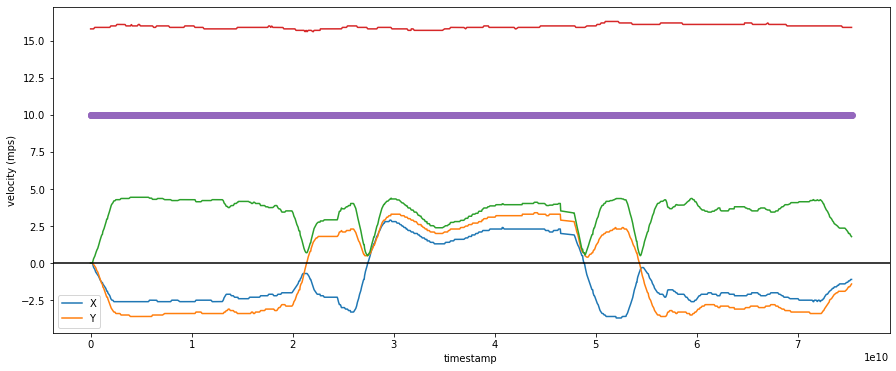

In [9]:
plt.figure(figsize=(15,6))
plt.plot(df['velocityX(mps)'])
plt.plot(df['velocityY(mps)'])
plt.plot(df['velocity(mps)'])

plt.plot(df['altitude(m)'])

plt.plot(10*df['isTakingVideo'], 'o')
plt.axhline(c='k')

plt.xlabel('timestamp')
plt.ylabel('velocity (mps)')
plt.legend(['X', 'Y'])

# plt.xlim([6300000+1.55939e12,6500000+1.55939e12])
plt.show()
# plt.figure(figsize=(15,6))

# plt.plot(df['timestamp'], df['distance(m)'])
# # plt.plot(df['timestamp'], df['altitude(m)'])

# plt.xlabel('timestamp')
# plt.ylabel('distance (m)')
# # plt.xlim([6300000+1.55939e12,6500000+1.55939e12])
# plt.show()

In [10]:
# Computing FOV experimentally
# interval of frames of video 0010: 159 - 201 / h=10m
# interval of frames of video 0019: 78 - 140 / h=15m
# interval of frames of video 0021: 2926 - 3159 / h=40m
# interval of frames of video 0025: 23 - 85 / h=15m
# interval of frames of video 0031: 228 - 310 / h=10m
# interval of frames of video 0034: 45 - 119 / h=16m
# interval of frames of video 0038: 74 - 148 / h=20m
# interval of frames of video 0041: 351 - 417 / h=10m
# interval of frames of video 0043: 133 - 229 / h=40m
# interval of frames of video 0003: 73 - 157 / h=40m
# interval of frames of video 0005: 3754 - 3831 / h=40m
# interval of frames of video 0017: 104 - 267 / h=40m
# interval of frames of video 0082: 446 - 551 / h=20m

info_fov = {
    "20180905_rectified_DJI_0010":{"frame_ini": 159, "frame_end": 201, "alt": 10},    
    "20180919_rectified_DJI_0019":{"frame_ini": 78, "frame_end": 140, "alt": 15},    
    "20180919_rectified_DJI_0021":{"frame_ini": 2926, "frame_end": 3159, "alt": 40},
    "20181022_rectified_DJI_0025":{"frame_ini": 23, "frame_end": 85, "alt": 15},
    "20181022_rectified_DJI_0031":{"frame_ini": 228, "frame_end": 310, "alt": 10},
    "20181029_rectified_DJI_0034":{"frame_ini": 45, "frame_end": 119, "alt": 16},
    "20181029_rectified_DJI_0038":{"frame_ini": 74, "frame_end": 148, "alt": 20},
    "20181112_rectified_DJI_0041":{"frame_ini": 351, "frame_end": 417, "alt": 10},
    "20181112_rectified_DJI_0043":{"frame_ini": 133, "frame_end": 229, "alt": 40},
    "20190601_rectified_DJI_0003":{"frame_ini": 73, "frame_end": 157, "alt": 40},
    "20190601_rectified_DJI_0005":{"frame_ini": 3754, "frame_end": 3831, "alt": 40},
    "20191031_rectified_DJI_0017":{"frame_ini": 104, "frame_end": 267, "alt": 40},
    "20191031_rectified_DJI_0082":{"frame_ini": 446, "frame_end": 551, "alt": 20},
}


ii = info_fov[video_name]["frame_ini"]
io = info_fov[video_name]["frame_end"]
h = info_fov[video_name]["alt"]

t0 = df.index[ii].total_seconds()
tf = df.index[io].total_seconds()


cover = df['deltaS(m)'].iloc[ii:io+1].sum()

theta = 2 * np.rad2deg(np.arctan(cover/(2*h)))
print(cover, theta)

13.442448635513122 45.572264955075866


In [11]:
# automaticaly part of frames selection
# selected acording to drone movement
key_frames_to_see = key_frames[video_name]
frames = []

for kf in key_frames_to_see:
    distance_traveled = 0
    
    frame_init = kf[0]
    frame_end = kf[1]
    
    frames.append(frame_init)  
    

    for index, (time, row) in enumerate(df.iloc[frame_init + 1:frame_end+1].iterrows()):       
        distance_traveled += row['deltaS(m)']     

        if distance_traveled >= cover:
            distance_traveled = 0
            frames.append(index + frame_init + 1)
            
    # include last frame in edge
    frames.append(frame_end)
    
# frames

In [12]:
# this frames were manualy selected to be removed or added in an attempt to build something closer to a mosaic
#(minimal (or none) intersection and objects counted only once (avoiding borders))
manual_frames = {"20180905_rectified_DJI_0010":{
    'remove': [957, 1004, 1048, 1090, 1135, 1176, 1216, 1256, 1313, 1365, 
                   1500, 1567, 1602, 1645, 1692, 1738],
    'append': [961, 1008, 1052, 1094, 1139, 1180, 1220, 1260, 1317, 1369,
                   1504, 1571, 1606, 1649, 1691, 1734]
    },
    "20180919_rectified_DJI_0019":{
        "remove":[],
        "append":[]    
    },    
    "20180919_rectified_DJI_0021":{
        "remove":[854, 3347, 4392, 4629,],
        "append":[385, 2995, 3357, 3726, 3743, 4058, 4382, 4652, 4987]        
    },    
    "20181022_rectified_DJI_0025":{
        "remove":[1583],
        "append":[1584]
        
    },
    "20181022_rectified_DJI_0031":{
        "remove":[202, 280, 538, 550],
        "append":[208, 286, 536, 545]
        
    },
    "20181029_rectified_DJI_0034":{
        "remove":[105, 1046, 1129,  1578, 1666],
        "append":[90, 1038, 1103, 1140, 1576, 1665]    
    },    
    "20181029_rectified_DJI_0038":{
        "remove":[],
        "append":[]    
    },
    "20181112_rectified_DJI_0041":{
        "remove":[191],
        "append":[188]    
    },
    "20181112_rectified_DJI_0043":{
        "remove":[348, 946, 3647],
        "append":[351, 943, 3018, 3297, 3581, 3651]    
    },
    "20190601_rectified_DJI_0003":{
        "remove":[0, 256, 341, 427, 513, 598, 684, 770, 855, 1025, 1343, 1639, 1726, 1898, 2328, 2586, 2844, 
                 3784, 3956, 4386, 4557, 4643, 4814, 4889, 5260, 5432, 5518, 5690, 5776, 5862,  5948, 6034],
        "append":[2, 243, 290, 340, 395, 452, 506, 581,  658, 726, 796, 864, 1287, 1433, 1637, 1700, 1732,
                 1886, 2321, 2585, 2820, 3789, 3955, 4384, 4534, 4606, 4675, 4821, 5232, 5427, 5525, 5685, 
                 5767, 5839, 5923, 5996, 6027]    
    },
    "20190601_rectified_DJI_0005":{
        "remove":[1407, 1847, 1963, 2287, 3677, 3874, 3955, 4116, 4196, 4276, 4757, 4838, 5078, 5158, 5248,
                 5794, 5875, 5956, 6037, 6117, 6197, 6277, 6357, 6517, 6597, 6677, 6757, 6998, 7705, 7786, 
                  7836],
        "append":[1414, 1877, 1969, 2283, 3699, 3879, 3959, 4115, 4191, 4268, 4743, 4840, 5077, 5151,
                 5790, 5871, 5946, 6026, 6110, 6210, 6287, 6365, 6504, 6586, 6660, 6741, 6991, 7277, 7670, 
                 7784, 7853]    
    },
    "20191031_rectified_DJI_0017":{
        "remove":[2746],
        "append":[2729]    
    },
    "20191031_rectified_DJI_0082":{
        "remove":[4873],
        "append":[4876]    
    },    
}

In [13]:
# adjust according to manualy picked frames
[frames.remove(f) for f in manual_frames[video_name]["remove"]]
[frames.append(f) for f in manual_frames[video_name]["append"]]
frames.sort()

In [14]:
# settings to save frames
compression_level = 3
ext_params = [cv2.IMWRITE_PNG_COMPRESSION, compression_level]

output_path = f"../data/v1/frames_pseudomosaic/{video_name}"
os.makedirs(output_path, exist_ok=True)

In [ ]:
# saving frames
for frame_idx in frames[::-1]:
#     print(frame_idx)
    _, f,_ = video.get_frame(frame_idx)
    
    cv2.imwrite(os.path.join(output_path, 'frame_{:04d}.png'.format(frame_idx)), f, ext_params)
    
#     plt.figure(figsize=(12,8))
#     plt.imshow(f[:,:,::-1])       
#     plt.show()